In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/SupervisedML/GenderVoice/

Mounted at /gdrive
/gdrive/MyDrive/SupervisedML/GenderVoice


# Imports and Load Data

In [2]:
# Preprocessing packages
import numpy as np 
from numpy import set_printoptions
import pandas as pd 

# Data Viz packages
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn preprocessing and metrics packages
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# Sklearn feature selection packages
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Sklearn model selection packages
from sklearn import tree
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Neural network packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from tensorflow.keras.optimizers import SGD

In [119]:
# Data from: https://www.kaggle.com/datasets/primaryobjects/voicegender
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
# Check for null values

data_null = data.isnull().sum()
data_null

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

# EDA

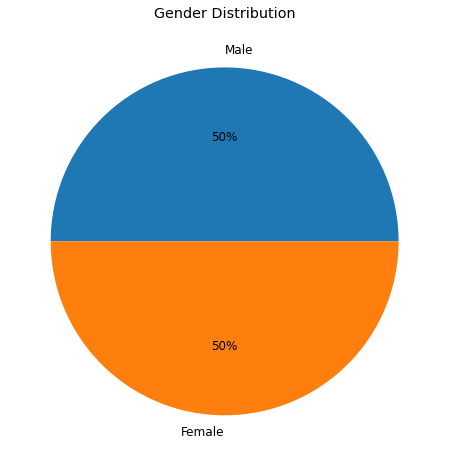

In [81]:
plt.figure(figsize=(10,8))

plt.pie(data.label.value_counts().values, 
        labels=['Male', 'Female'], 
        autopct='%.0f%%')

plt.title("Gender Distribution")
plt.show()

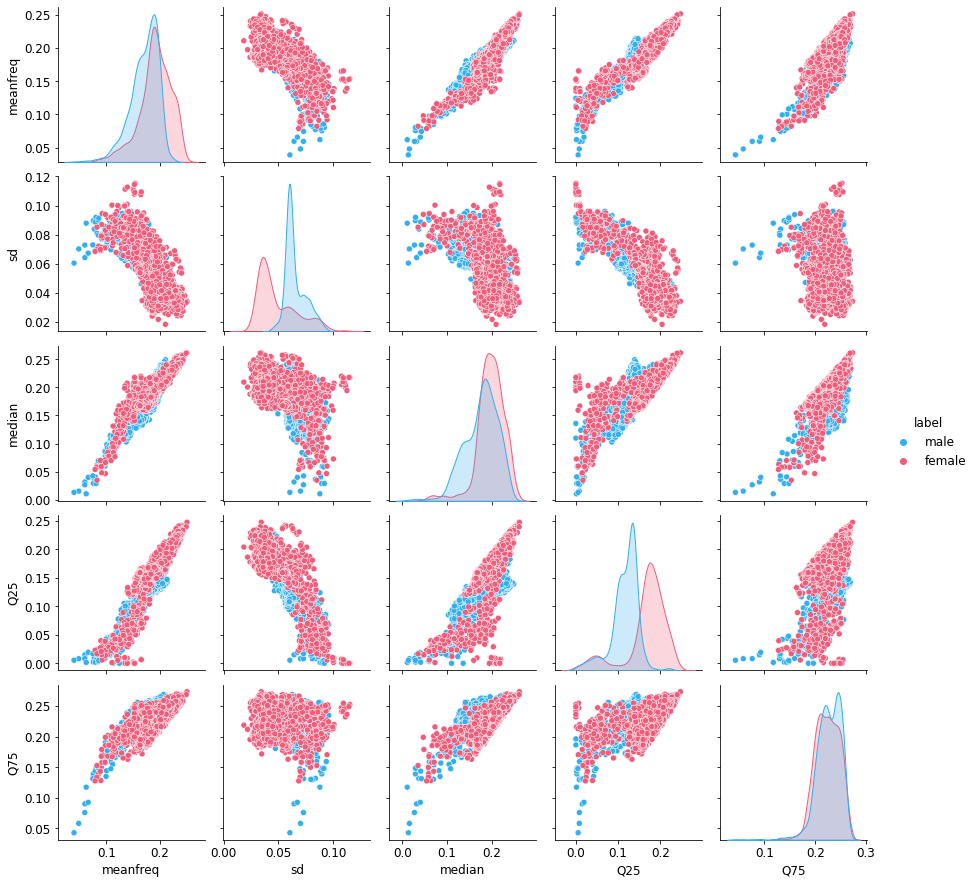

In [120]:
df_pairplot = data.copy()
df_pairplot = df_pairplot.iloc[:,0:5]
df_pairplot['label'] = data['label']

colors = ["#34AFED", "#F05D7B"]
sns.set_palette(sns.color_palette(colors))

sns.pairplot(df_pairplot, hue='label')

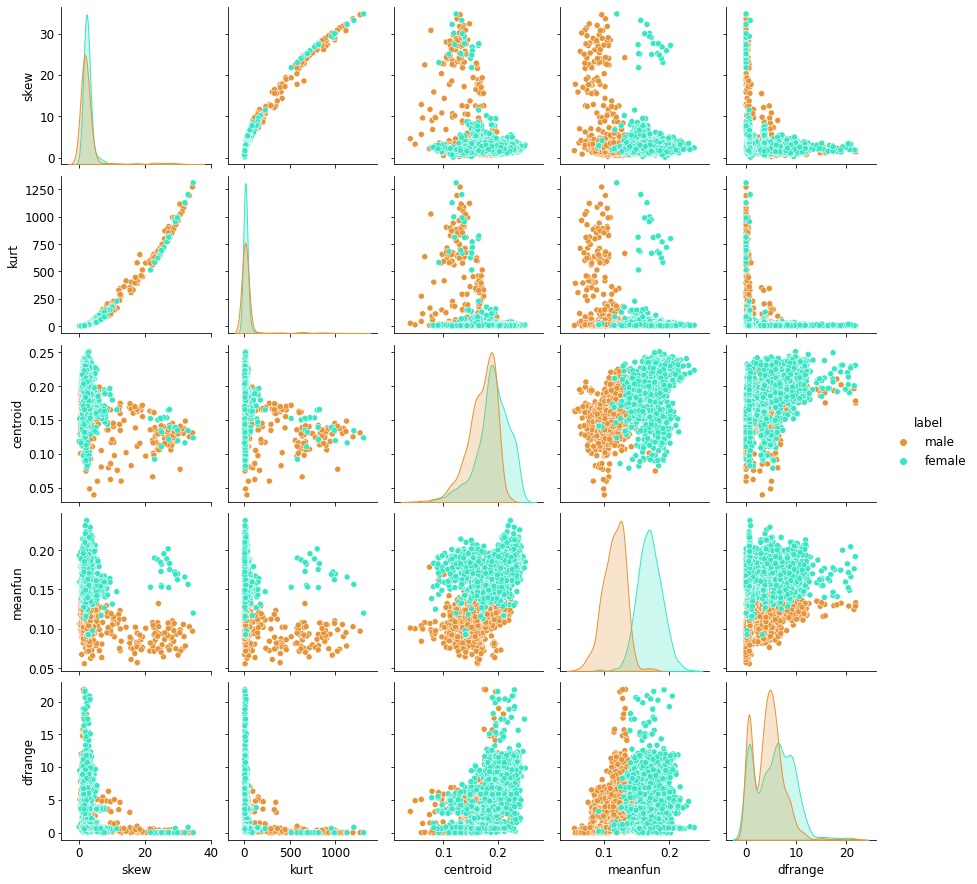

In [123]:
df_pairplot2 = data[['skew','kurt','centroid','meanfun','dfrange','label']]

colors = ["#E69437", "#37E6C3"]
sns.set_palette(sns.color_palette(colors))

sns.pairplot(df_pairplot2, hue='label')

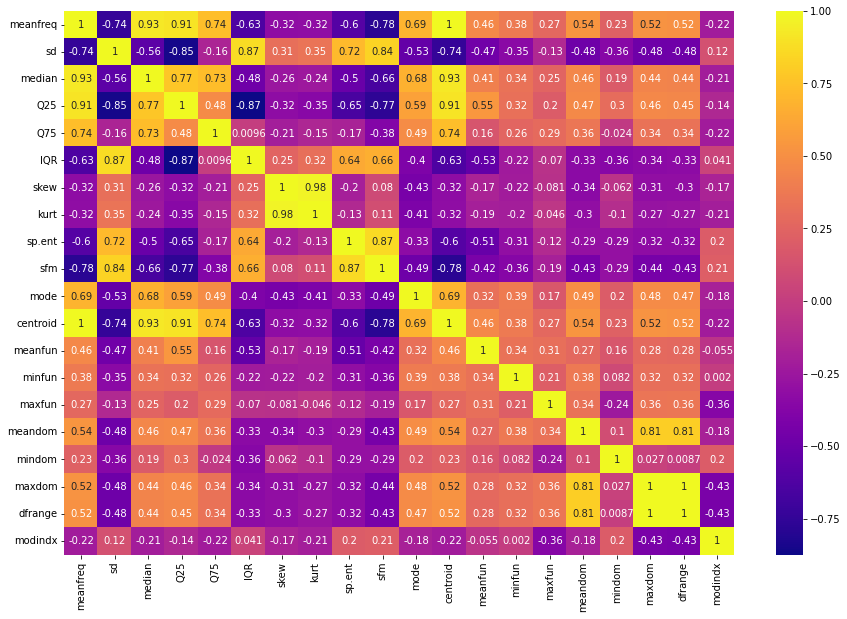

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
corr = sns.heatmap(data.drop(columns='label').corr(), ax=ax, cmap='plasma', annot=True)

# Encode Target

In [ ]:
le = LabelEncoder()

data.label = le.fit_transform(data.label)

# Split for Training

In [37]:
X = data.drop(['label'], axis = 1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

sc = StandardScaler(with_mean=True, with_std=True)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('-------------\nTraining Data \n-------------')
print(f'Features: {X_train.shape}')
print(f'Target:   {y_train.shape}\n')

print('-------------\nTesting Data \n-------------')
print(f'Features: {X_test.shape}')
print(f'Target:   {y_test.shape}')

-------------
Training Data 
-------------
Features: (2534, 20)
Target:   (2534,)

-------------
Testing Data 
-------------
Features: (634, 20)
Target:   (634,)


In [38]:
y_train

1710    0
415     1
2947    0
916     1
2781    0
       ..
2763    0
905     1
1096    1
235     1
1061    1
Name: label, Length: 2534, dtype: int64

# Supervised Learning algorithms

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000,
                            max_depth=None,
                            max_features='auto',
                            min_samples_leaf=4,
                            bootstrap=True,
                            n_jobs=1,
                            random_state=0)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"The accuracy score for Random Forest is {(accuracy_score(y_test, y_pred_rf)*100).round(2)} %")

The accuracy score for Random Forest is 97.48 %


In [21]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

      female       0.97      0.98      0.97       311
        male       0.98      0.97      0.98       323

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



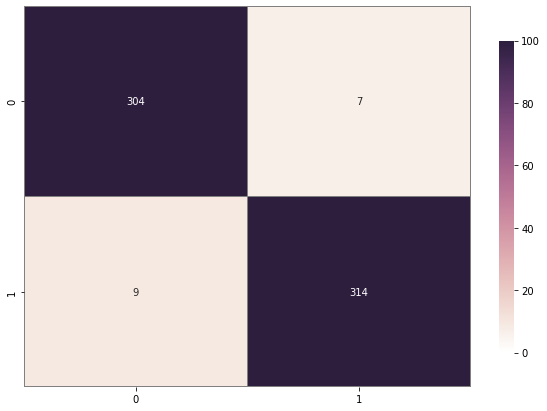

In [23]:
import seaborn as sns

confusion_mat_dct = confusion_matrix(y_test, y_pred_rf)
df_cm = pd.DataFrame(confusion_mat_dct)

plt.figure(figsize = (10,7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

plt.show()

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

dct = DecisionTreeClassifier(criterion="gini", random_state=1234)
dct.fit(X_train,y_train)
y_pred_dct = dct.predict(X_test)
print(f"The accuracy score for Decision Tree is {(accuracy_score(y_test,y_pred_dct)*100).round(2)} %")

The accuracy score for Decision Tree is 97.63 %


In [20]:
print(classification_report(y_test,y_pred_dct))

              precision    recall  f1-score   support

      female       0.97      0.98      0.98       311
        male       0.98      0.97      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



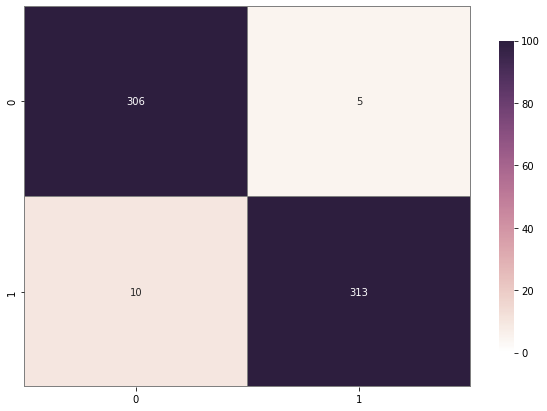

In [22]:
import seaborn as sns

confusion_mat_dct = confusion_matrix(y_test, y_pred_dct)
df_cm = pd.DataFrame(confusion_mat_dct)

plt.figure(figsize = (10,7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

plt.show()

## Support Vector Machine

In [24]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_score(y_test,y_pred_svc)
print(f"The accuracy score for SVM is {(accuracy_score(y_test,y_pred_svc)*100).round(2)} %")

The accuracy score for SVM is 97.63 %


In [25]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

      female       0.97      0.98      0.98       311
        male       0.98      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



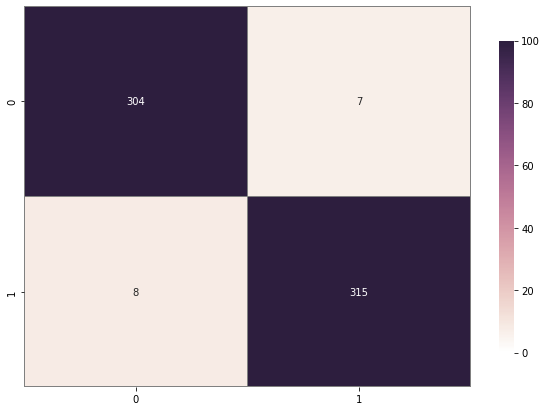

In [26]:
import seaborn as sns

confusion_mat_dct = confusion_matrix(y_test, y_pred_svc)
df_cm = pd.DataFrame(confusion_mat_dct)

plt.figure(figsize = (10,7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

plt.show()

## XGBoost

In [27]:
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 43 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [40]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# fit model no training data
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [41]:
# make predictions for test data
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.48%


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       311
           1       0.98      0.97      0.98       323

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



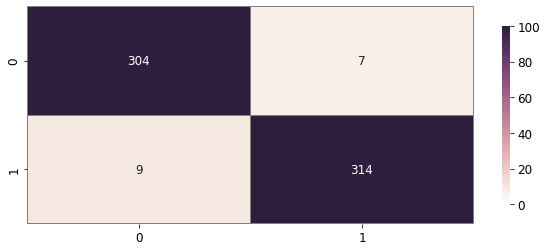

In [43]:
import seaborn as sns

confusion_mat_rf = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion_mat_rf)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (10,4))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

plt.show()

## CNN

In [61]:
# Implement your code here
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from tensorflow.keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

model.add(Dense(units=64, input_shape=[X_train.shape[1]], activation='relu', kernel_regularizer=l2(0.1)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

# Compile model
sgd = SGD(learning_rate=0.01)
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1344      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,490
Trainable params: 3,490
Non-trainable params: 0
_________________________________________________________________


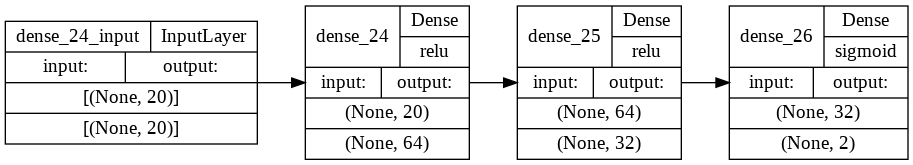

In [62]:
from keras.utils.vis_utils import plot_model
plot_model(model, 
           to_file='model_plot.png',
           show_shapes=True, 
           show_layer_names=True, rankdir='LR', 
           show_layer_activations=True)

In [63]:
# Fit the model
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 256,
    epochs = 50, 
    verbose=1, 
    validation_data=(X_test, y_test)
)

Epoch 1/50
10/10 [==============================] - 1s 26ms/step - loss: 3.6167 - accuracy: 0.5296 - val_loss: 3.3417 - val_accuracy: 0.6767
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 3.1493 - accuracy: 0.7755 - val_loss: 2.9383 - val_accuracy: 0.8502
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 2.7700 - accuracy: 0.8836 - val_loss: 2.5935 - val_accuracy: 0.9132
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 2.4418 - accuracy: 0.9250 - val_loss: 2.2862 - val_accuracy: 0.9401
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 2.1505 - accuracy: 0.9451 - val_loss: 2.0135 - val_accuracy: 0.9495
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 1.8933 - accuracy: 0.9582 - val_loss: 1.7738 - val_accuracy: 0.9558
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 1.6681 - accuracy: 0.9621 - val_loss: 1.5655 - val_accuracy: 0.9574
Epoch 8/50
10/10 [=

Loss after final iteration:  0.10103356838226318
Training loss after final iteration:  0.08793223649263382


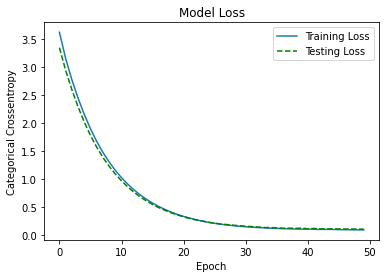

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

print("Loss after final iteration: ", history.history['val_loss'][-1])
print("Training loss after final iteration: ", history.history['loss'][-1])

fig = plt.figure(figsize=(6,4))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Model Loss')

plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()

In [83]:
# make predictions for test data
y_pred_cnn = xgb_model.predict(X_test)
cnn_predictions = [round(value) for value in y_pred_cnn]

# evaluate predictions
accuracy = accuracy_score(y_test, cnn_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.48%


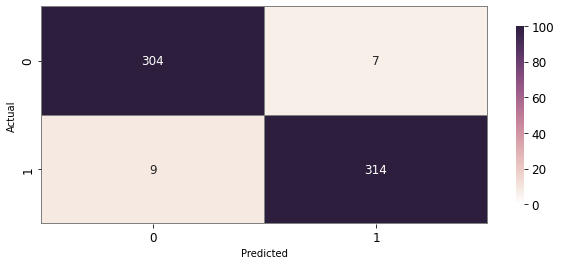

In [94]:
import seaborn as sns

confusion_mat_cnn = confusion_matrix(y_test, y_pred_cnn)
df_cm = pd.DataFrame(confusion_mat_cnn)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (10,4))

lab = ['Male', 'Female']

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

res.set_xlabel('Predicted', fontsize=10)
res.set_ylabel('Actual', fontsize=10)

plt.show()

# Model Comparison

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [RandomForestClassifier(random_state=42),
               DecisionTreeClassifier(random_state=42),
               SVC(random_state=42,probability=True),
               XGBClassifier(random_state=42),
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    models = cls.fit(X_train, y_train)
    yproba = models.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

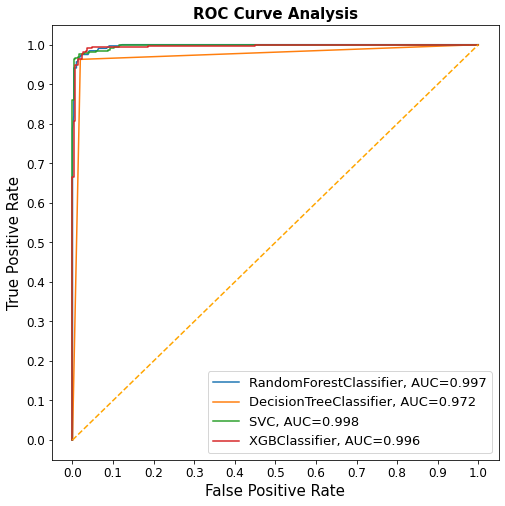

In [72]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()